<style>
.text_cell_render {
font-family: Times New Roman, serif;
}
</style>

# Title Page
<b> NAME OF PROJECT </b> : Palmer Archipelago (Antarctica) penguin data set cassification using supervised and unsupervised learning.<br>
Prepared by : <br>
<b> Abhishek Agarwala. </b> <br>
<b> Tahsin Elahi Navin.</b> <br>


<style type='text/css'>
.CodeMirror{
    font-size: 12px;
}

div.output_area pre {
    font-size: 12px;
}
</style>

# Abstract
In this project we used the Palmer Archipelago (Antarctica) penguin data set which is called the new Iris. Our project attempts to answer how well unsupervised learning like <b> K-Means and different variations of it </b> can perform for classification compared to traditional supervised learning methods such as <b> Logistic Regression </b> ,<b> Random Forest Classifier </b>. It is an alasysis on how unsupervised learning can work if a dataset is well-clustered.

# Table of Contents
1. Introduction <br>
    a) Introduction to project <br>
    b) Problem Statement <br>
    c) Dataset <br>
        i) Data Collection <br>
        ii) Exploratory Data Analysis <br>
        iii) Data preparation <br>
2. Methodology <br>
    a) Method used <br>
    b) Training details <br>
3. Experiments <br>
    a) Results/Evaluation <br>
    b) Error analysis <br>
    c) Future work <br>
4. Conclusion <br>
5. Code <br>
        

# Introduction


# a)  Introduction to project
The Palmer Archipelago (Antarctica) penguin dataset is extremely good for Clustering. So we tried to show that if a dataset can be well_clustered it may be possible to use unsupervised learning methods for classification by first CLustering the dataset. This was our motivation behind the project.

# b) Problem Statement
 Palmer Archipelago (Antarctica) penguin data set is known for being a well clustered dataset. The dataset has a target feature known as Species which has 3 classes. These classes are 3 different penguin species. They are : <br>
&emsp; <b> Adelie Penguin (Pygoscelis adeliae) </b> <br>
&emsp; <b> Chinstrap penguin (Pygoscelis antarctica) </b> <br>
&emsp; <b> Gentoo penguin (Pygoscelis papua) </b> <br>
In this project we used the unsupervised learning <b>K-Means </b> method for <b>Clustering </b> and <b>Classification </b> and compared its results with traditional methods for <b>Classfication </b> such as <b>Logistic Regression, RandomForestClassifier </b>. The dataset is extremely good for Clustering. So we tried to show that if a dataset can be well_clustered it may be possible to use unsupervised learning methods for classification. This was our motivation behind the project.

In [44]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\penguins_lter.csv")
df.head()

['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']


# Dataset Description:

This is the description of the features of our dataset:
* <b>studyName</b> - Sampling expedition name from which data were collected, generated.
* <b>Sample Number</b> - An integer denoting the continuous numbering sequence for each sample.
* <b>Species</b> - Categorical variable for species of the penguin. There are 3 unique values. These are the target variables.
* <b>Region</b> - Categorical variable denoting the region of the penguins. It has only one unique value
* <b>Island</b> - Categorical variable denoting the name of the islands where the penguins were residing. There are 3 unique vlaues.
* <b>Stage</b> - Categrical variable denoting the reproductive stage of pengunins. It has only one unique value.
* <b>Individual ID</b> - Categorical variable denoting the unique ID for the specific penguin. It has unique values for all penguins
* <b>Clutch Completion</b> - Categorical variable denoting if the study nest observed with a full clutch, i.e., 2 eggs
* <b>Culmen Length</b> - Integer variable denoting the length of the dorsal ridge of a bird's bill (millimeters)
* <b>Culmen Depth</b> - Integer variable denoting the depth of the dorsal ridge of a bird's bill (millimeters)
* <b>Flipper Length</b> - Integer variable denoting the length penguin flipper (millimeters)
* <b>Body Mass</b> - Integer variable denoting the penguin body mass (grams)
* <b>Sex</b> - Categorical variable denoting the gender of the penguins
* <b>Delta 15 N (o/oo)</b> - Integer variable denoting the measure of the ratio of stable isotopes 15N:14N
* <b>Delta 13 C (o/oo)</b> - Integer variable denoting the measure of the ratio of stable isotopes 13C:12C
* <b>Comments</b> - A string with text providing additional relevant information for data




In [4]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [5]:
print(df.columns)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder
objList = df.select_dtypes(include = "object").columns
print (objList)
le = LabelEncoder()
dfvariable=df.copy()
for feat in objList:
    dfvariable[feat] = le.fit_transform(dfvariable[feat].astype(str))

print (dfvariable.info())
print()
print(dfvariable.head)

Index(['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID',
       'Clutch Completion', 'Date Egg', 'Sex', 'Comments'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    int32  
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    int32  
 3   Region               344 non-null    int32  
 4   Island               344 non-null    int32  
 5   Stage                344 non-null    int32  
 6   Individual ID        344 non-null    int32  
 7   Clutch Completion    344 non-null    int32  
 8   Date Egg             344 non-null    int32  
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-nu

In [7]:
print('Covariance:')
dfvariable.cov()



Covariance:


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
studyName,0.669706,27.963523,0.025697,0.0,-0.048478,0.0,9.408231,0.020544,-0.653027,0.243345,-0.097395,1.949701,27.661162,-0.027510,0.054177,-0.201899,0.106126
Sample Number,27.963523,1634.600990,-6.150925,0.0,-0.176283,0.0,229.509390,1.036274,-69.668045,-52.009045,-1.779071,23.151258,-227.623862,-0.942471,0.154585,-15.612673,1.392671
Species,0.025697,-6.150925,0.798020,0.0,-0.412367,0.0,-6.998441,0.008950,5.547427,3.564264,-1.311634,10.723243,537.240829,-0.005187,-0.235127,-0.134105,0.313343
Region,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Island,-0.048478,-0.176283,-0.412367,0.0,0.527358,0.0,14.370059,-0.029561,-2.106516,-1.397525,0.816234,-5.759051,-325.942790,0.017662,0.177032,0.205717,-0.304529
Stage,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Individual ID,9.408231,229.509390,-6.998441,0.0,14.370059,0.0,2647.062852,-1.885958,-8.798020,25.649540,28.027420,-141.862599,-11805.277306,0.099227,11.928660,14.712598,-0.947149
Clutch Completion,0.020544,1.036274,0.008950,0.0,-0.029561,0.0,-1.885958,0.093972,0.033697,-0.066664,-0.055159,0.466370,31.045172,0.001661,-0.029478,-0.036292,0.206285
Date Egg,-0.653027,-69.668045,5.547427,0.0,-2.106516,0.0,-8.798020,0.033697,189.418774,23.226462,-9.147150,66.734707,3425.829603,0.472354,-1.847422,-1.171536,3.548291
Culmen Length (mm),0.243345,-52.009045,3.564264,0.0,-1.397525,0.0,25.649540,-0.066664,23.226462,29.807054,-2.534234,50.375765,2605.591912,0.808759,-0.179601,0.818786,1.646370


# Correlation?

Our data is still raw, but we can still get a good idea of which variables are more related to each other. Here, which columns are highly correlated without much tampering? 

* Sample Number has very low correlation to any other variable

* Culmen Length has good correlation with Flipper Length, Body Mass and some but very small correlation with Delta 13 C

* Culmen Depth has good correlation with only Delta 15N and Delta 13C

* Flipper Length has good correlation with Culmen Length, Body Mass

* Body Mass has good Correlation with Culmen Length, Flipper Length

* Delta 15 N (o/oo) has good correlation with Culmen Depth, and Delta 13C

* Delta 13 C (o/oo) has good correlation with Culmen Depth and Delta 15N

* Species has high correlation with Culmen Length, Culmen Depth, Flipper Length, Body Mass


Here we can only see correlation for the numerical variables and after label encoding the categorical variables. We see that the features **StudyName, Sample Number, Region, Stage, Individual ID, Clutch Completion, Date Egg and Comments** have no significant correlation to the real anatomical features of the penguins. So we will drop these columns. 


In [8]:
print('Correlation:')
dfvariable.corr()

Correlation:


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
studyName,1.000000,0.845169,0.035150,NaN,-0.081573,NaN,0.223452,0.081891,-0.057980,0.054545,-0.060354,0.169675,0.042209,-0.060091,0.121522,-0.314557,0.099968
Sample Number,0.845169,1.000000,-0.170305,NaN,-0.006004,NaN,0.110335,0.083612,-0.125203,-0.236356,-0.022352,0.040849,-0.007042,-0.041669,0.006952,-0.488690,0.026554
Species,0.035150,-0.170305,1.000000,NaN,-0.635659,NaN,-0.152269,0.032682,0.451204,0.731369,-0.744076,0.854307,0.750491,-0.010379,-0.477606,-0.189595,0.270393
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Island,-0.081573,-0.006004,-0.635659,NaN,1.000000,NaN,0.384613,-0.132792,-0.210766,-0.353647,0.571035,-0.565825,-0.561515,0.043476,0.450829,0.364479,-0.323264
Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Individual ID,0.223452,0.110335,-0.152269,NaN,0.384613,NaN,1.000000,-0.119578,-0.012425,0.091148,0.275352,-0.195729,-0.285596,0.003447,0.421302,0.359683,-0.014191
Clutch Completion,0.081891,0.083612,0.032682,NaN,-0.132792,NaN,-0.119578,1.000000,0.007987,-0.040227,-0.092019,0.109265,0.127536,0.009686,-0.175471,-0.150337,0.518739
Date Egg,-0.057980,-0.125203,0.451204,NaN,-0.210766,NaN,-0.012425,0.007987,1.000000,0.309623,-0.337111,0.345400,0.310903,0.061349,-0.245683,-0.108379,0.198742
Culmen Length (mm),0.054545,-0.236356,0.731369,NaN,-0.353647,NaN,0.091148,-0.040227,0.309623,1.000000,-0.235053,0.656181,0.595110,0.269434,-0.059759,0.189025,0.241288


In [9]:
dfnewreal=df.drop(['studyName','Sample Number','Region','Stage','Individual ID','Comments'],axis=1)
dfnewreal.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


In [10]:
from collections import Counter
datemonth=pd.DatetimeIndex(dfnewreal['Date Egg']).month
print(datemonth.unique())
c = Counter(datemonth)
print( c.items() )
dfnewreal=dfnewreal.drop(['Date Egg'],axis=1)
dfnewreal.head(5)

Int64Index([11, 12], dtype='int64', name='Date Egg')
dict_items([(11, 330), (12, 14)])


,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


# Drop rows with Missing Values

We will drop our rows with missing values as a baseline estimation and try to improve upon that further down the line. We have decided not to impute the values in any manner for now. 


In [11]:
val=input("There are 2 approaches here. One is dropping the nan valued samples and another is imputation with mode.\nFor dropping press 1 and for imputation press 2\n")
if val==1:
    print(dfnewreal.isnull().sum())
    dfreal=dfnewreal.dropna(axis=0)
    dfreal.shape
    print(dfreal.isnull().sum())
    dfreal.loc[dfreal['Sex']=='.','Sex']=dfreal['Sex'].mode()[0]
else :
    print(dfnewreal.isnull().sum())
    columns=dfnewreal.columns
    for column in columns:
        dfnewreal[column][~(dfnewreal[column]==dfnewreal[column])]=dfnewreal[column].mode()[0]
    dfnewreal.shape
    print(dfnewreal.isnull().sum())
    dfnewreal.loc[dfnewreal['Sex']=='.','Sex']=dfnewreal['Sex'].mode()[0]
dfreal=dfnewreal

There are 2 approaches here. One is dropping the nan valued samples and another is imputation with mode.
For dropping press 1 and for imputation press 2
1
Species                 0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1016\3598722093.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnewreal[column][~(dfnewreal[column]==dfnewreal[column])]=dfnewreal[column].mode()[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_1016\3598722093.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnewreal[column][~(dfnewreal[column]==dfnewreal[column])]=dfnewreal[column].mode()[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_1016\3598722093.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [12]:
from sklearn.preprocessing import LabelEncoder
# print(type(dfreal[['Sex']].mode().values()))

labelencoder = LabelEncoder()
dfreal['SpeciesNew']=labelencoder.fit_transform(dfreal['Species'])
dfreal.head()
dfreal2=dfreal.drop(['Species'],axis=1)
dfreal2.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),SpeciesNew
0,Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,7.63220,-27.01854,0
1,Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0
2,Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0
3,Torgersen,Yes,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854,0
4,Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0


**After dropping the Missing value rows, we now have 330 rows and 11 columns**

In [13]:
dfreal2.shape

(344, 10)

**We now want to One-Hot encode the cateforical variables using dummy encoding. This often gives us better accuracy for categorical features**

In [14]:
clutch_feature=pd.get_dummies(dfreal2['Clutch Completion'],prefix='Clutch Completion',prefix_sep='_',drop_first=True)
dftemp=dfreal2.drop(['Clutch Completion'],axis=1)
dfreal3= pd.concat([dftemp,clutch_feature],axis=1)
dfreal3.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),SpeciesNew,Clutch Completion_Yes
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,7.63220,-27.01854,0,1
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0,1
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0,1
3,Torgersen,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854,0,1
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0,1


In [15]:
print(dfreal3['Island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [16]:
island_feature=pd.get_dummies(dfreal3['Island'],prefix='Island',prefix_sep='_',drop_first=True)
dftemp1=dfreal3.drop(['Island'],axis=1)
dfreal4=pd.concat([dftemp1,island_feature],axis=1)
dfreal4.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),SpeciesNew,Clutch Completion_Yes,Island_Dream,Island_Torgersen
0,39.1,18.7,181.0,3750.0,MALE,7.63220,-27.01854,0,1,0,1
1,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0,1,0,1
2,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0,1,0,1
3,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854,0,1,0,1
4,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0,1,0,1


In [17]:
sex_feature=pd.get_dummies(dfreal4['Sex'],prefix='Sex',prefix_sep='_',drop_first=True)
dftemp3=dfreal4.drop(['Sex'],axis=1)
dfreal6=pd.concat([dftemp3,sex_feature],axis=1)
dfreal6.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),SpeciesNew,Clutch Completion_Yes,Island_Dream,Island_Torgersen,Sex_MALE
0,39.1,18.7,181.0,3750.0,7.63220,-27.01854,0,1,0,1,1
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454,0,1,0,1,0
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302,0,1,0,1,0
3,41.1,17.0,190.0,3800.0,7.63220,-27.01854,0,1,0,1,1
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426,0,1,0,1,0


**The Boxplot shows that only the feature Body Mass has large value range. So, we should standardize our features**

<AxesSubplot:>

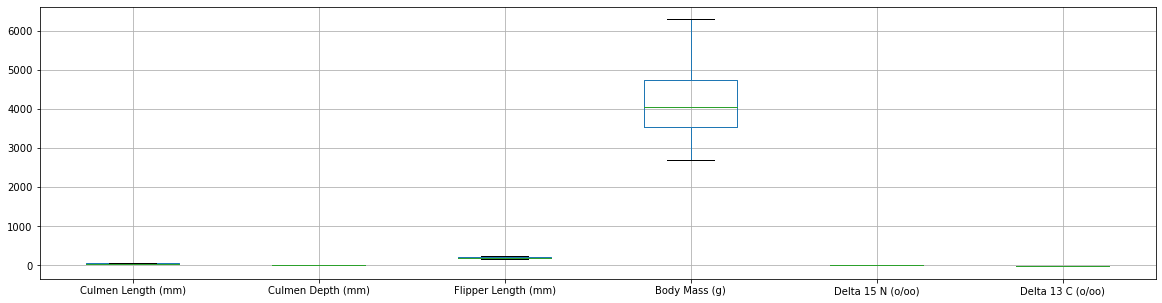

In [18]:
feature_columns=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
df.boxplot(feature_columns, figsize = (20, 5))

<AxesSubplot:>

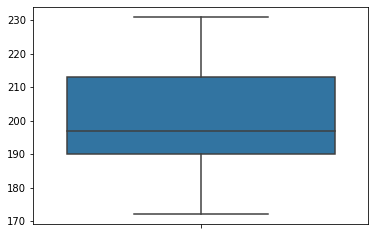

In [19]:
import seaborn as sns
sns.boxplot(y=dfreal6['Flipper Length (mm)'].values)

In [20]:
columns=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

# After doing the standardization the value we get is z-score and if that value is less than -3 or greater than 3 then it is considered as an outlier

In [21]:
#Standardization for outlier checking

columnsnew=['C1','C2','F1','BM','D1','D2']
datafram=pd.DataFrame(columns=columnsnew)
i=0
for col in columns:
    datafram[columnsnew[i]]=(dfreal6[col]-dfreal6[col].mean())/(dfreal6[col].std())
    i=i+1
datafram.head()
sm=0
for col in columnsnew:
    sm+=((datafram[col]<-3)|(datafram[col]>3)).sum()
print(sm)

0


# As the feature values differ widely in differnet ranges,we need to use scaling.We have used standardization


In [22]:
from sklearn.preprocessing import StandardScaler
for column in columns:
    dfreal6[column]=(dfreal6[column]-dfreal6[column].mean())/(dfreal6[column].std())
dfreal6.head()
#Preprocessing Finished

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),SpeciesNew,Clutch Completion_Yes,Island_Dream,Island_Torgersen,Sex_MALE
0,-0.882090,0.787030,-1.413412,-0.561634,-1.812977,-1.564680,0,1,0,1,1
1,-0.808667,0.126816,-1.057420,-0.499150,0.447928,1.271977,0,1,0,1,0
2,-0.661821,0.431530,-0.416635,-1.186480,-0.549808,0.492653,0,1,0,1,0
3,-0.514975,-0.076326,-0.772626,-0.499150,-1.812977,-1.564680,0,1,0,1,1
4,-1.322628,1.091743,-0.559031,-0.936542,0.133770,0.503346,0,1,0,1,0


# Pairplot below shows the paiwise correlation of each variable in regards of each species, which is our target label for the classification. Many new columns were added as a result of One-Hot Encoding. 

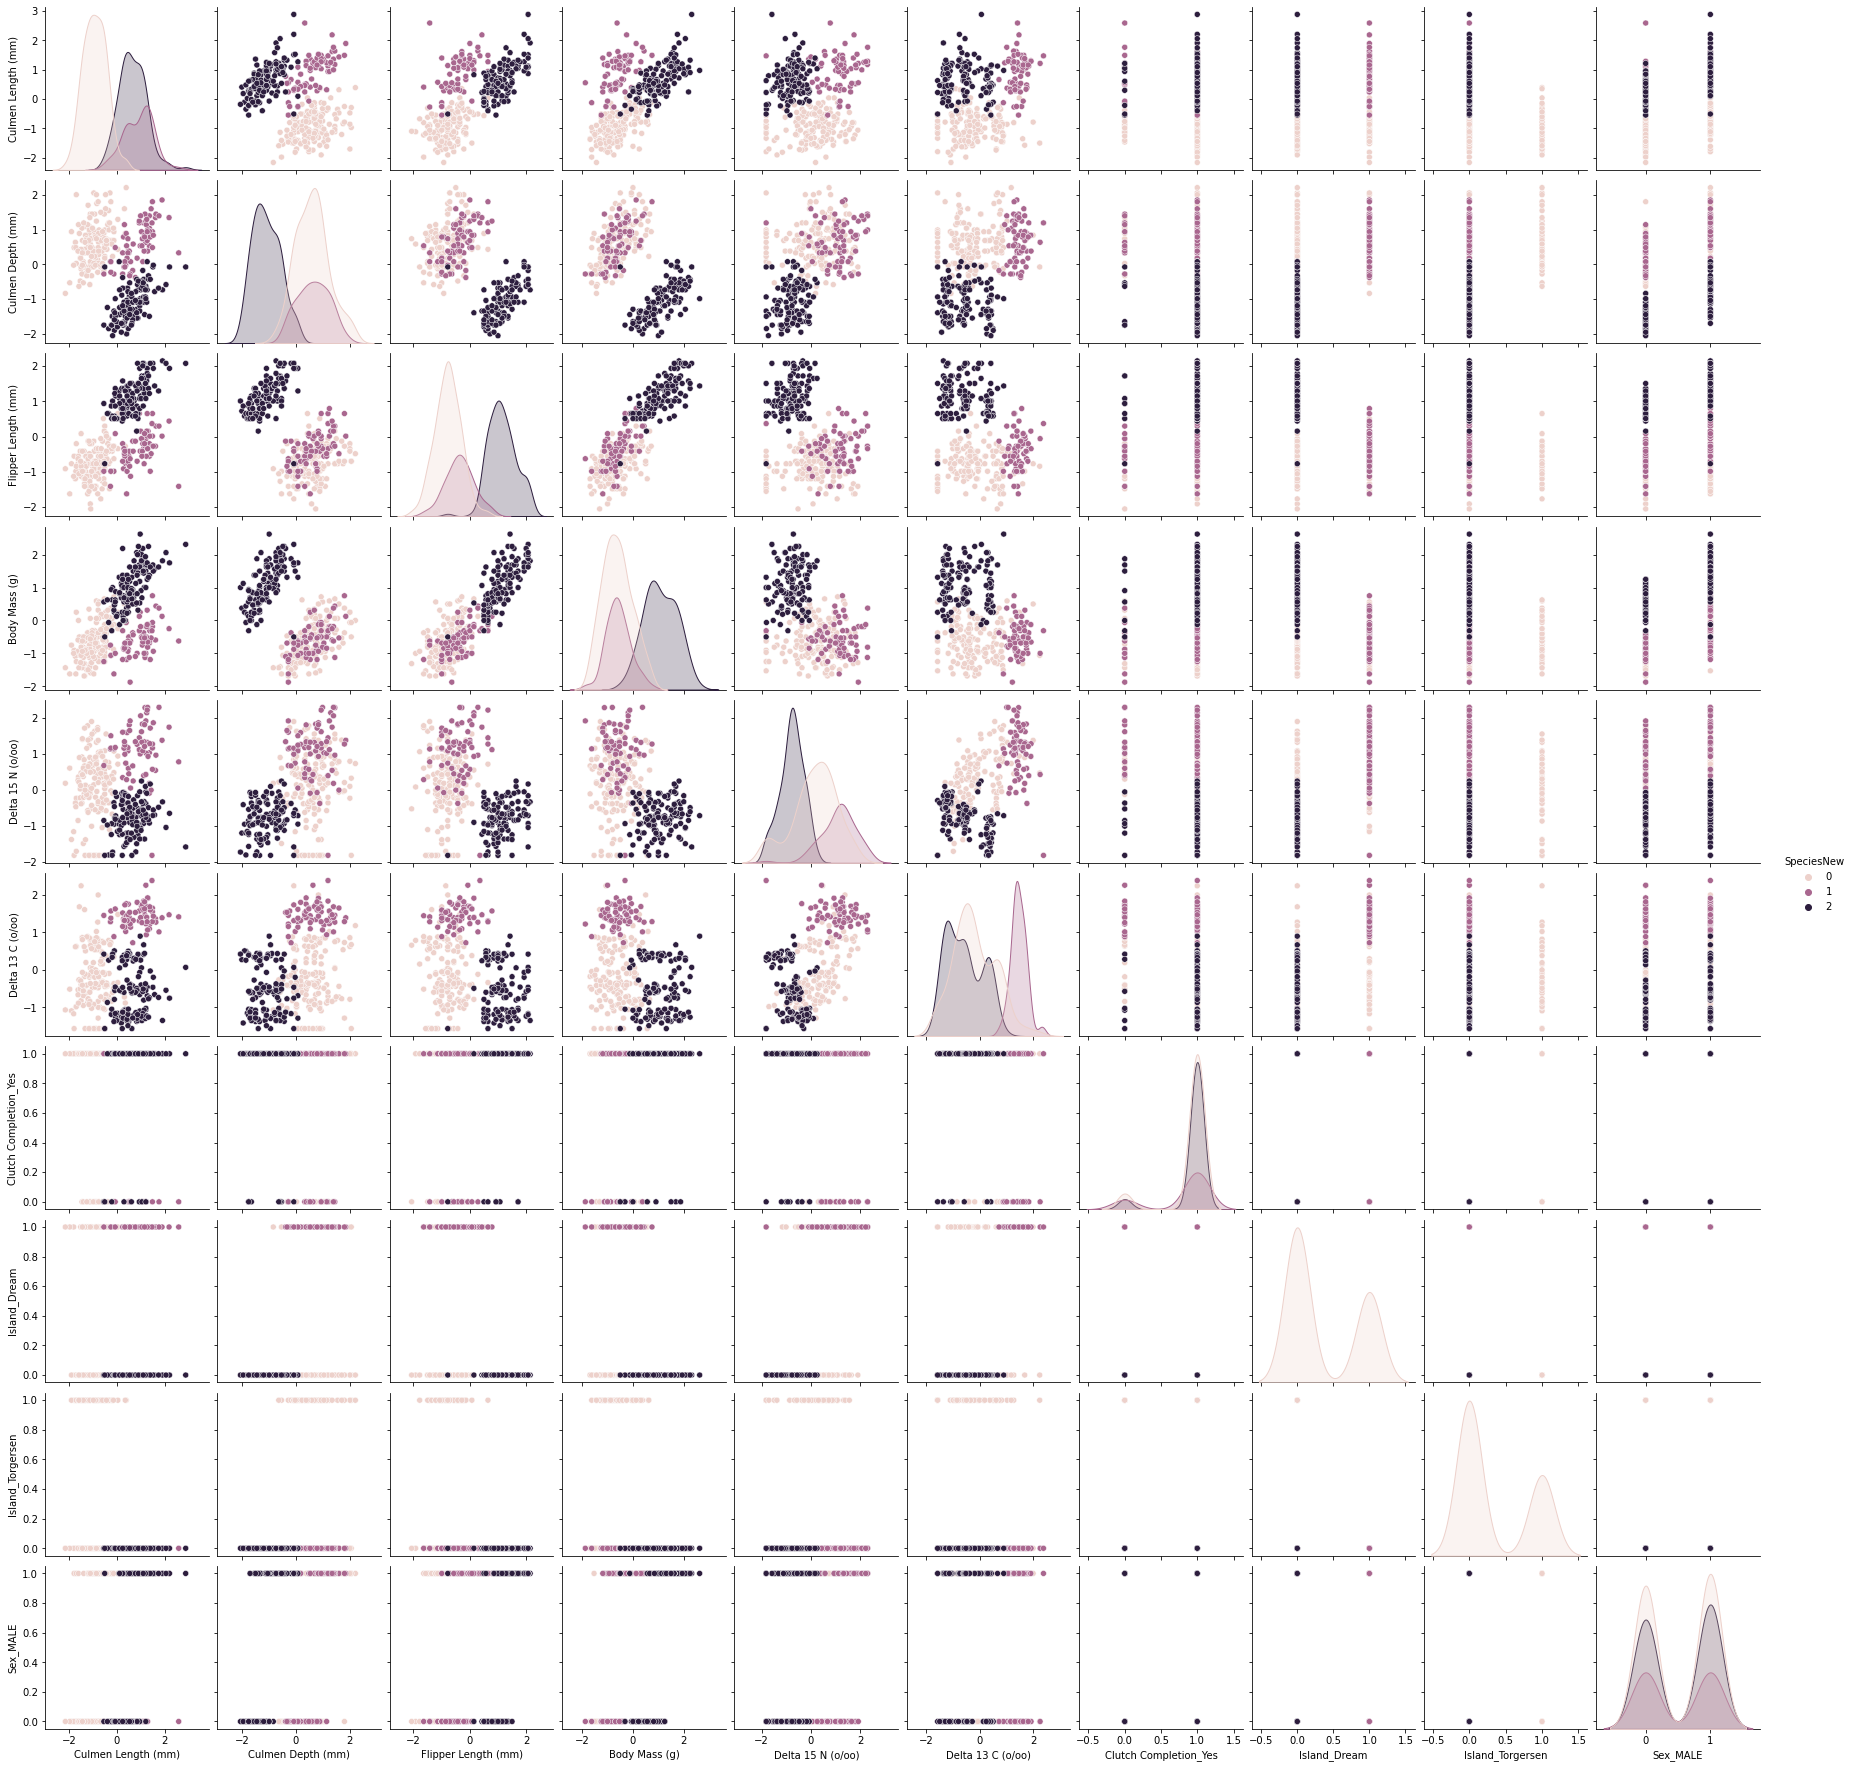

In [23]:
import seaborn as sns
sns.pairplot(dfreal6,hue='SpeciesNew')

In [24]:
print(dfreal6.corr())

                       Culmen Length (mm)  Culmen Depth (mm)  \
Culmen Length (mm)               1.000000          -0.234635   
Culmen Depth (mm)               -0.234635           1.000000   
Flipper Length (mm)              0.656856          -0.582472   
Body Mass (g)                    0.595720          -0.471339   
Delta 15 N (o/oo)               -0.006961           0.511599   
Delta 13 C (o/oo)                0.224159           0.373120   
SpeciesNew                       0.727832          -0.741363   
Clutch Completion_Yes           -0.035790          -0.090270   
Island_Dream                     0.036188           0.455932   
Island_Torgersen                -0.381137           0.268633   
Sex_MALE                         0.319192           0.353939   

                       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Culmen Length (mm)                0.656856       0.595720          -0.006961   
Culmen Depth (mm)                -0.582472      -0.471339           0.5

In [25]:
target=dfreal6[['SpeciesNew']]
dfreal7=dfreal6.drop(['SpeciesNew'],axis=1)
dfreal7.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion_Yes,Island_Dream,Island_Torgersen,Sex_MALE
0,-0.882090,0.787030,-1.413412,-0.561634,-1.812977,-1.564680,1,0,1,1
1,-0.808667,0.126816,-1.057420,-0.499150,0.447928,1.271977,1,0,1,0
2,-0.661821,0.431530,-0.416635,-1.186480,-0.549808,0.492653,1,0,1,0
3,-0.514975,-0.076326,-0.772626,-0.499150,-1.812977,-1.564680,1,0,1,1
4,-1.322628,1.091743,-0.559031,-0.936542,0.133770,0.503346,1,0,1,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
X_trainreal,X_test,Y_trainreal,Y_test=train_test_split(dfreal7,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)
X_train,X_val,Y_train,Y_val=train_test_split(X_trainreal,Y_trainreal,test_size=0.3,random_state=21,shuffle=True,stratify=Y_trainreal)

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
prediction=logmodel.predict(X_val)
print(X_train.shape)
print(Y_train.shape)
print(classification_report(Y_val,prediction))
print(confusion_matrix(Y_val,prediction))
print(accuracy_score(Y_val,prediction))

(192, 10)
(192, 1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

[[37  0  0]
 [ 0 16  0]
 [ 0  0 30]]
1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
dfval=dfreal7.drop(['Body Mass (g)'],axis=1)
X_trainrealtemp,X_testtemp,Y_trainrealtemp,Y_testtemp=train_test_split(dfval,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)
X_traintemp,X_valtemp,Y_traintemp,Y_valtemp=train_test_split(X_trainrealtemp,Y_trainrealtemp,test_size=0.3,random_state=21,shuffle=True,stratify=Y_trainreal)

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_traintemp,Y_traintemp.values.ravel())
prediction=logmodel.predict(X_valtemp)
print(X_traintemp.shape)
print(Y_traintemp.shape)
print(classification_report(Y_valtemp,prediction))
print(confusion_matrix(Y_valtemp,prediction))
print(accuracy_score(Y_valtemp,prediction))

(192, 9)
(192, 1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

[[37  0  0]
 [ 0 16  0]
 [ 0  0 30]]
1.0


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
parameters={'max_depth':[1,2,3,4]}
clf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters)
clf.fit(X_train,Y_train.values.ravel())
bestmodel=clf.best_estimator_
prediction=bestmodel.predict(X_val)
features = bestmodel.feature_importances_
vals=zip(X_train.columns,features)
vals=sorted(vals, key = lambda t: t[1],reverse=True)
lvals=list(vals)
pdf=pd.DataFrame(lvals,columns=['Features','Values'])
print(clf.best_params_)
print(clf.best_score_)
print(cross_val_score(clf.best_estimator_,X_val,Y_val.values.ravel(),cv=5))
print(accuracy_score(Y_val,prediction))
print(classification_report(Y_val,prediction))
print(confusion_matrix(Y_val, prediction))
print(accuracy_score(Y_val,prediction))
print(pdf)

# random forest feature_importances_ vs df.corr ( which is above )

{'max_depth': 4}
0.9844804318488529
[1.     1.     1.     1.     0.9375]
0.9879518072289156
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00        30

    accuracy                           0.99        83
   macro avg       0.98      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83

[[36  1  0]
 [ 0 16  0]
 [ 0  0 30]]
0.9879518072289156
                Features    Values
0     Culmen Length (mm)  0.282568
1    Flipper Length (mm)  0.237516
2      Delta 13 C (o/oo)  0.172201
3      Culmen Depth (mm)  0.131688
4          Body Mass (g)  0.079897
5      Delta 15 N (o/oo)  0.057201
6           Island_Dream  0.030462
7       Island_Torgersen  0.005557
8  Clutch Completion_Yes  0.001542
9               Sex_MALE  0.001367


In [31]:
dfreal8=dfreal7.drop(['Body Mass (g)','Clutch Completion_Yes','Sex_MALE'],axis=1)
dfreal8.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen
0,-0.882090,0.787030,-1.413412,-1.812977,-1.564680,0,1
1,-0.808667,0.126816,-1.057420,0.447928,1.271977,0,1
2,-0.661821,0.431530,-0.416635,-0.549808,0.492653,0,1
3,-0.514975,-0.076326,-0.772626,-1.812977,-1.564680,0,1
4,-1.322628,1.091743,-0.559031,0.133770,0.503346,0,1


In [32]:
X_trainreallog,X_testlog,Y_trainreallog,Y_testlog=train_test_split(dfreal8,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)
X_trainlog,X_vallog,Y_trainlog,Y_vallog=train_test_split(X_trainreallog,Y_trainreallog,test_size=0.3,random_state=21,shuffle=True,stratify=Y_trainreallog)
logmodel = LogisticRegression()
logmodel.fit(X_trainlog,Y_trainlog.values.ravel())
testprediction=logmodel.predict(X_vallog)
print(classification_report(Y_vallog, testprediction))
print(confusion_matrix(Y_vallog, testprediction))
print(accuracy_score(Y_vallog, testprediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

[[37  0  0]
 [ 0 16  0]
 [ 0  0 30]]
1.0


In [33]:
class KMeans:
     def __init__(self, dataval,n_centers=3, init="random", distance_metric="l2", threshold=1e-4,):
        self.n_centers = n_centers
        self.threshold = threshold
        self.data = dataval # array with shape (100 samples, 2 features)
        self.centers = None # array with shape (n_centers, 2)
        self.prev_centers = None # array with shape (n_centers, 2)
        self.data_cluster = None # array with shape (100, )
        self.distances = None # array with shape (n_centers, 100)
        self.distance_metric = distance_metric
        self.init = init
        self.n_dim = None
        # self.max_iter = 1
    
     def fit(self, data):
        """ Initialize data for training
        Parameters:
        data: input features of shape (100, 2)
        """
        self.data = data
        self.n_dim = self.data.shape[-1]
        if self.init == "kmeans++":
            self.centers = self._generate_kmeans_plus_centers()
        elif self.init == "uniform":
            self.centers = self._generate_uniform_centers()
        else:
            self.centers = self._generate_random_sampled_centers()
    
     def _generate_kmeans_plus_centers(self):
        """KMeans++ initialization"""
        centers = []
        X = self.data
        Xarr=np.array(X)
        ## Sample the first point at random
        initial_index = np.random.choice(range(Xarr.shape[0]),)
        centers.append(np.asarray(X.iloc[initial_index, :].tolist()))
        ## Loop and select the remaining points
        for i in range(self.n_centers - 1):
            siz = len(centers)
            distance=[]
            for j in range(siz):
                foo = np.array(((centers[j]) - Xarr)**2)
                distance.append(foo)
            vals=np.sum(distance,axis=2)
            if i == 0:
                pdf = vals / np.sum(vals)
                centroid_new = Xarr[np.random.choice(range(Xarr.shape[0]), replace=False, p=pdf.flatten())]
            else:
                ## Calculate distance of each point from its nearest centroid
                dist_min = np.min(vals, axis=0)
                pdf = dist_min / np.sum(dist_min)
                ## Sample one point from the given prob distribution
                centroid_new = Xarr[np.random.choice(range(Xarr.shape[0]), replace=False, p=pdf.flatten())]
            centers.append(centroid_new.tolist())
        return np.array(centers)

     def _generate_uniform_centers(self):
        """Generate uniform centers"""
        centers = None
        return centers

     def _generate_random_sampled_centers(self):
        """Generate random sampled centers"""
        rand_index = None
        centers = self.data[rand_index]
        return centers

     def _l2(self, point1, point2):
        """Euclidean distance"""
        sum_sq = np.sum(np.square(point1 - point2))
        return np.sqrt(sum_sq)

     def _l1(self, point1, point2):
        """Absolute distance"""
        value=np.abs(point1-point2)
        return value

     def _calculate_distance(self):
        """Wrapper for calculating distance with data and center"""
        dist = []
        final_dist = []
        dt = np.array(self.data)
        for center in self.centers:
            if self.distance_metric == "l1":
                arrval = dt-center
                var=np.sqrt(np.sum(np.square(arrval),axis=1))
            else:
                arrval = dt-center
                var=np.sqrt(np.sum(np.square(arrval),axis=1))
            final_dist.append(var)
        self.distances = np.array(final_dist)
        return self.distances

     def _assign_clusters(self):
        """Assign each data sample to small distanced centroid"""
        self.data_cluster = np.argmin(
        self.distances, axis=0)
        # finding minimum over the the centers
        return self.data_cluster

     def _update_centers(self):  
        """Update centers with new mean among the cluster"""
        self.prev_centers = np.copy(self.centers)
        for i in range(self.n_centers):
            self.centers[i] = np.mean(
            self.data[self.data_cluster == i], axis=0
            ) # mean among the row: axis=0
        return self.centers

     def converge(self):
        """ Training convergence"""
        self._calculate_distance()
        self._assign_clusters()
        self._update_centers()
        
     def is_optimal(self):
        """ Check if the centers are optimal."""
        non_optimal = np.abs(np.sum((self.prev_centers - self.centers),axis=1)) > self.threshold
        if non_optimal.astype(int).sum() == 0:
            return True
        return False


In [34]:
X_trainrealkmeans,X_testkmeans,Y_trainrealkmeans,Y_testkmeans=train_test_split(dfreal8,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)
X_trainkmeans,X_valkmeans,Y_trainkmeans,Y_valkmeans=train_test_split(X_trainrealkmeans,Y_trainrealkmeans,test_size=0.3,random_state=21,shuffle=True,stratify=Y_trainrealkmeans)
logmodel = LogisticRegression()
logmodel.fit(X_trainkmeans,Y_trainkmeans.values.ravel())
prediction=logmodel.predict(X_valkmeans)
print(accuracy_score(Y_valkmeans,prediction))
print(X_trainkmeans.shape)
print(Y_trainkmeans.shape)


1.0
(192, 7)
(192, 1)


In [35]:
## number of clusters
n_clusters = 3
## Noisy KMeans
kmeans_random = KMeans(X_trainkmeans,n_centers=n_clusters, init="kmeans++", distance_metric="l2")
kmeans_random.fit(X_trainkmeans)
print(kmeans_random.centers)
kmeans_random.converge()
while not kmeans_random.is_optimal():
    kmeans_random.converge()
print(kmeans_random.centers)

[[ 0.53130315 -1.44753806  1.0073327  -0.47549464 -0.49028989  0.
   0.        ]
 [-1.26756115 -0.33025422 -1.12861828 -0.12366561 -0.40715533  1.
   0.        ]
 [ 1.22882196  1.14252902 -0.55903136  1.01766778  0.93411722  1.
   0.        ]]
[[ 0.69191604 -1.15253331  1.13192984 -0.7588629  -0.49335196  0.
   0.        ]
 [-1.03280067  0.51372275 -0.82883569 -0.07845422 -0.38365748  0.32894737
   0.31578947]
 [ 0.61007995  0.8177126  -0.32615337  1.1259614   1.39393529  0.91666667
   0.0625    ]]


In [36]:
mydict={}
dfkmeanstrain=np.array(X_trainkmeans)
siz=len(dfkmeanstrain)
targetdict=Y_trainkmeans.values.ravel()
for i in range(siz):
    if len(mydict)==3 :
        break
    val1=kmeans_random.data_cluster[i]
    val2=targetdict[i]
    print(type(targetdict[i]))
    if val2 not in mydict:
        mydict[val2]=val1
print(mydict)

<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
{0: 1, 2: 0, 1: 2}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


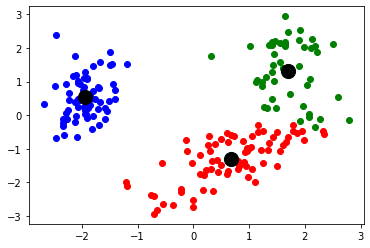

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_trainkmeans)
Center_pca=pca.transform(kmeans_random.centers)
cluster_list=np.unique(kmeans_random.data_cluster)
col_list=['red','green','blue']
for i in cluster_list: 
    X_cluster1=X_pca[kmeans_random.data_cluster==mydict[i]]
    plt.scatter(X_cluster1[:,0],X_cluster1[:,1],c=col_list[i])
plt.scatter(Center_pca[:,0],Center_pca[:,1],s=200,c='black')
plt.show()

In [38]:
dist = []
final_dist = []
trainkcenters=kmeans_random.centers
dkmeans=np.array(X_trainkmeans)
for center in trainkcenters:
    arrval = dkmeans-center
    var=list(np.sqrt(np.sum(np.square(arrval),axis=1)))
    final_dist.append(var)
final_dist=np.array(final_dist)
print(final_dist.shape)
targetkmeans=Y_trainkmeans.values.ravel()
cluster = np.argmin(np.array(final_dist), axis=0)
for i in range(len(cluster)):
    targetkmeans[i]=mydict[targetkmeans[i]]
print(cluster)
print(accuracy_score(targetkmeans,cluster))
print(classification_report(targetkmeans, cluster))
print(confusion_matrix(targetkmeans, cluster))

(3, 192)
[1 0 0 2 1 1 0 1 2 0 0 2 0 0 2 2 0 1 1 0 2 2 1 1 0 1 0 1 1 0 0 0 0 2 0 0 0
 1 0 1 0 0 1 0 0 2 2 2 2 1 1 1 1 1 1 0 2 1 1 1 0 1 0 0 1 1 0 2 2 2 1 2 0 0
 0 2 0 2 1 1 1 2 1 2 1 2 0 0 0 0 1 1 1 2 1 1 1 1 1 0 0 1 1 1 1 2 1 0 0 1 2
 0 0 1 1 2 2 1 0 1 0 0 0 1 1 1 2 1 2 0 0 0 2 1 0 1 1 2 1 0 2 0 0 2 1 0 2 1
 1 0 0 2 1 1 2 1 0 2 2 2 1 0 1 1 2 1 0 0 0 0 2 0 2 2 1 2 2 1 0 2 1 0 0 2 1
 2 1 1 0 1 1 0]
0.9427083333333334
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.99      0.88      0.93        85
           2       0.79      1.00      0.88        38

    accuracy                           0.94       192
   macro avg       0.93      0.96      0.94       192
weighted avg       0.95      0.94      0.94       192

[[68  1  0]
 [ 0 75 10]
 [ 0  0 38]]


In [39]:
dist = []
final_dist = []
dkmeans = np.array(X_valkmeans)
kcenters=kmeans_random.centers
for center in kcenters:
    arrval = dkmeans-center
    var=list(np.sqrt(np.sum(np.square(arrval),axis=1)))
    final_dist.append(var)
final_dist=np.array(final_dist)
print(final_dist.shape)
targetvalkmeans=Y_valkmeans.values.ravel()
cluster = np.argmin(np.array(final_dist), axis=0)
for i in range(len(cluster)):
    targetvalkmeans[i]=mydict[targetvalkmeans[i]]
# finding minimum over the the centers
print(cluster)
print(accuracy_score(targetvalkmeans,cluster))
print(classification_report(targetvalkmeans, cluster))
print(confusion_matrix(targetvalkmeans, cluster))

(3, 83)
[1 1 0 1 1 0 1 2 0 1 1 0 0 0 2 2 2 1 0 1 2 1 1 0 1 1 0 0 1 1 0 0 1 0 1 2 1
 1 0 0 0 1 1 2 0 1 2 1 2 0 1 1 2 0 1 0 0 0 0 2 1 2 1 0 1 0 1 1 2 0 0 2 2 0
 0 0 1 2 2 2 1 2 2]
0.9518072289156626
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.89      0.94        37
           2       0.80      1.00      0.89        16

    accuracy                           0.95        83
   macro avg       0.93      0.96      0.94        83
weighted avg       0.96      0.95      0.95        83

[[30  0  0]
 [ 0 33  4]
 [ 0  0 16]]
